# $Tarea$ $N°2: TEL-341$
#### $Nombre:$ $Alex$ $Peña$ $Pavez$
#### $Rol:$ $201130027-0$

# Pregunta 1

- Para esta parte de la tarea, se crea desde el simulador un archivo denominado "Prob_Block_RED.txt" el cual posee el siguiente formato:

                                 nodos:enlaces:canales:[prob de bloqueo]

- Dependiendo de la red que se esta simulando, la sección "[prob de bloqueo]" tendra distintas cantidades de probabilidad de bloqueo de la red, ya que tal como se observa en el desarrollo de la tarea, dependiendo de la cantidad de usuarios en la red, se obtendran más probabilidades.  


- La cantidad de canales o longitudes de ondas necesarias para obtener una probabilidad de bloqueo "cero" se obtiene determinando que enlace de la red es el mas ocupado, ya que si el enlace es muy pequeño, y todos los usuarios pasan por aquel enlace, se forma un cuello de botella, por lo tanto, se debe simular en función de ese enlace. Aún así, en esta tarea, no se realizó un calculo matemático de aquella cantidad de enlaces y tampoco una automatización de esa problemática, pero ese es el razonamiento para hallar la cantidad óptima para poder empezar a hacer simulaciones.


- El resultado que se espera, es que a medida que disminuye la cantidad óptima de canales, la probabilidad debe aumentar hasta una probabilidad de bloqueo del orden de 10^⁻3. Existe la estrategia de empezar con "1" canal por enlace e iterar aumentado de a 1 los canales hasta llegar a una probabilidad de bloqueo igual a cero, pero se comprobó empíricamente que este camino era demasiado largo y la simulación se tornaría demasiado larga, por lo tanto se opta por el camino de empezar desde el canal óptimo e ir disminuyendo hasta encontrar la probabilidad de 10^-3, reduciendo significativamente el tiempo de simulación. 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [53]:
def func_red(lista):
    datos = map(int,[lista[1],lista[2],lista[3]])
    probs = lista[4:(len(lista)-1)]
    probs = [float(x) for x in probs]
    if(lista[0]=="UKNet.rut"):
        nombre = lista[0][0:5]
        return [nombre,datos,probs]
    elif(lista[0]=="EON.rut"):
        nombre = lista[0][0:3]
        return [nombre,datos,probs]
    elif(lista[0]=="EuroCore.rut"):
        nombre = lista[0][0:8]
        return [nombre,datos,probs]
    elif(lista[0]=="EuroLarge.rut"):
        nombre = lista[0][0:9]
        return [nombre,datos,probs]
    elif(lista[0]=="NSFNet.rut"):
        nombre = lista[0][0:6]
        return [nombre,datos,probs]
    else:
        nombre = lista[0][0:7]
        return [nombre,datos,probs]
    
def canales(canal,lista):
    return range(canal,canal-len(lista),-1)
        
archivo = open("Prob_Block_RED.txt","r")

array1=archivo.readline().split(":")
array2=archivo.readline().split(":")
array3=archivo.readline().split(":")
array4=archivo.readline().split(":")
array5=archivo.readline().split(":")
array6=archivo.readline().split(":")

red1=func_red(array1)
red2=func_red(array2)
red3=func_red(array3)
red4=func_red(array4)
red5=func_red(array5)
red6=func_red(array6)


c_red1=canales(red1[1][2],red1[2])
c_red2=canales(red2[1][2],red2[2])
c_red3=canales(red3[1][2],red3[2])
c_red4=canales(red4[1][2],red4[2])
c_red5=canales(red5[1][2],red5[2])
c_red6=canales(red6[1][2],red6[2])


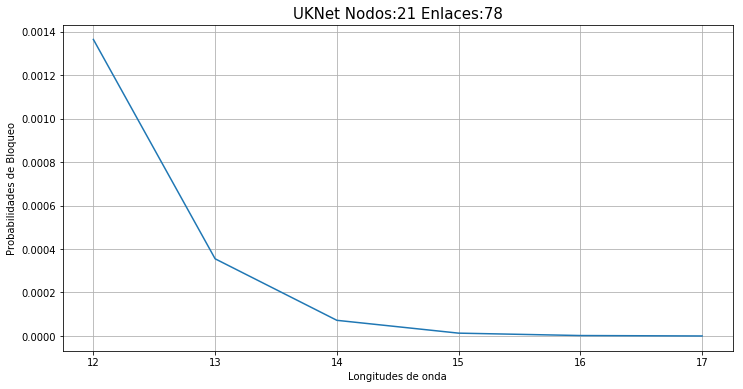

In [54]:
plt.title(red1[0]+" Nodos:"+str(red1[1][0])+" Enlaces:"+str(red1[1][1]),fontsize=15)
plt.xlabel("Longitudes de onda")
plt.ylabel("Probabilidades de Bloqueo")
plt.plot(c_red1,red1[2])
plt.grid()

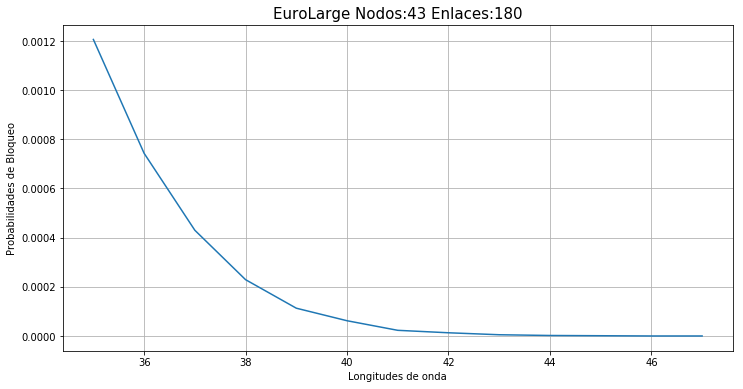

In [48]:
plt.title(red2[0]+" Nodos:"+str(red2[1][0])+" Enlaces:"+str(red2[1][1]),fontsize=15)
plt.xlabel("Longitudes de onda")
plt.ylabel("Probabilidades de Bloqueo")
plt.plot(c_red2,red2[2])
plt.grid()

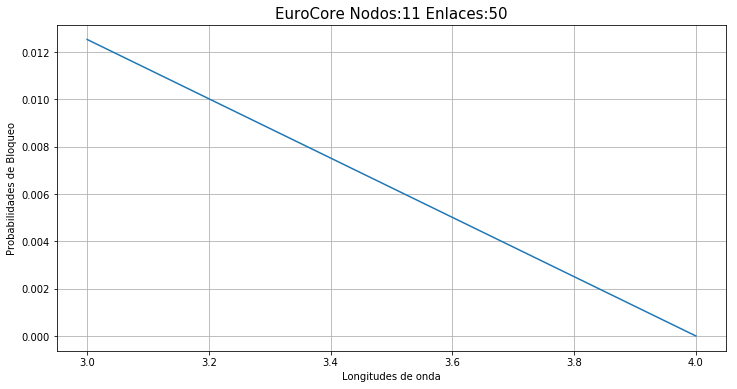

In [49]:
plt.title(red3[0]+" Nodos:"+str(red3[1][0])+" Enlaces:"+str(red3[1][1]),fontsize=15)
plt.xlabel("Longitudes de onda")
plt.ylabel("Probabilidades de Bloqueo")
plt.plot(c_red3,red3[2])
plt.grid()

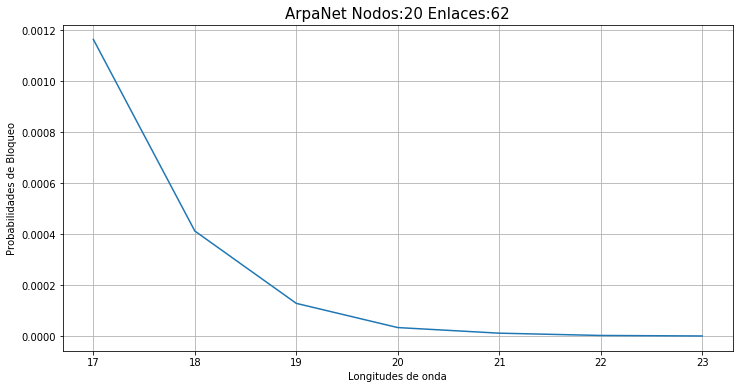

In [50]:
plt.title(red4[0]+" Nodos:"+str(red4[1][0])+" Enlaces:"+str(red4[1][1]),fontsize=15)
plt.xlabel("Longitudes de onda")
plt.ylabel("Probabilidades de Bloqueo")
plt.plot(c_red4,red4[2])
plt.grid()

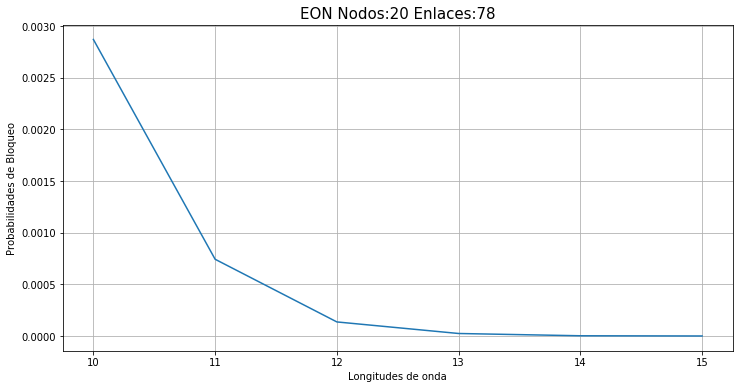

In [51]:
plt.title(red5[0]+" Nodos:"+str(red5[1][0])+" Enlaces:"+str(red5[1][1]),fontsize=15)
plt.xlabel("Longitudes de onda")
plt.ylabel("Probabilidades de Bloqueo")
plt.plot(c_red5,red5[2])
plt.grid()

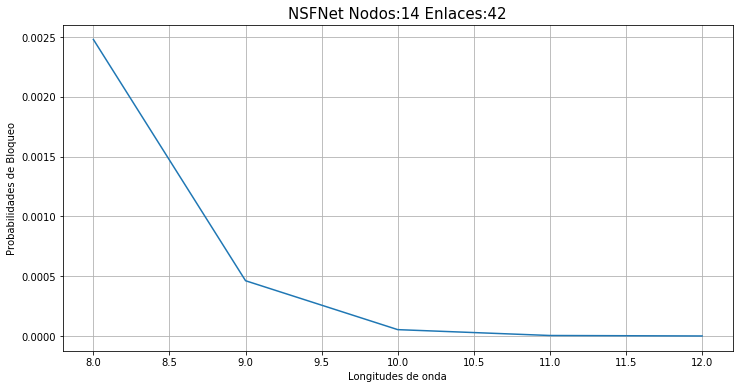

In [52]:
plt.title(red6[0]+" Nodos:"+str(red6[1][0])+" Enlaces:"+str(red6[1][1]),fontsize=15)
plt.xlabel("Longitudes de onda")
plt.ylabel("Probabilidades de Bloqueo")
plt.plot(c_red6,red6[2])
plt.grid()

- Una vez graficado los resultados, se puede comprobar claramente, que a medida que se aumenta los canales, la probabilidad de bloqueo se acerca más a "cero". Ademas se aprecia de manera grafica que la red "EuroLarge" es la red ms compleja debido a la cantidad de nodos y enlaces que posee. Es por esta razón tambien que la simulación de esta red es la que mas tarda, ya que tiene 43 nodos, lo que implíca que existen 1806 usuarios en la red, convirtiendose en la red mas densa de las que se analizó.

# Pregunta 2

- Para esta pregunta, el simulador genera en la última iteración un archivo llamado "Prob_Block_USR.txt" el cual entrega la información de la probabilidad de bloqueo de todos los usuarios, la cantidad de saltos que existe en la ruta de cada usuario, la última probabilidad de bloque de la red y la cantidad de canales necesarios para lograr esa probabilidad.

- En esta parte se calcula un promedio de las probabilidades de bloqueo por usuario, agrupando todas las probabilidades que poseen la misma cantidad de saltos y dividiendo por la cantidad de suariso que poseen esa cantidad de saltos, formando así la "probabilidad de bloqueo promedio" por red. Posteriormente se grafican dichas cantidades por separado.

- El resultado que se espera es que a medida que hay mas saltos en la ruta de un usuario, existe mayor probabilidad de que la conexión falle, ya que tiene una mayor cantidad de puntos de falla y esto se traduce en un bloqueo y basta que un solo enlace de la ruta este totalmente ocupado, para generar un bloqueo.

In [28]:
def LlenarTemp4(lista):
    t=[]
    for i in range(0,len(lista)):
        t.append(lista[i].split('\t'))
    return t

def Div_Zero(c):
    if(c==0):
        return 1
    else:
        return c

def Calc_Prom(lista):
    c1=0
    c2=0
    c3=0
    c4=0
    c5=0
    c6=0
    c7=0
    c8=0
    sum1=0
    sum2=0
    sum3=0
    sum4=0
    sum5=0
    sum6=0
    sum7=0
    sum8=0
    for i in range(0,len(lista)):
        if (len(lista[i])== 4):
            if(float(lista[i][3])== 1.0):
                c1=c1+1
                sum1 = sum1+float(lista[i][2])
            elif(float(lista[i][3])== 2.0):
                c2=c2+1
                sum2 = sum2+float(lista[i][2])
            elif(float(lista[i][3])== 3.0):
                c3=c3+1
                sum3 = sum3+float(lista[i][2])
            elif(float(lista[i][3])== 4.0):
                c4=c4+1
                sum4 = sum4+float(lista[i][2])
            elif(float(lista[i][3])== 5.0):
                c5=c5+1
                sum5 = sum5+float(lista[i][2])
            elif(float(lista[i][3])== 6.0):
                c6=c6+1
                sum6 = sum6+float(lista[i][2])
            elif(float(lista[i][3])== 7.0):
                c7=c7+1
                sum7 = sum7+float(lista[i][2])
            elif(float(lista[i][3])== 8.0):
                c8=c8+1
                sum8 = sum8+float(lista[i][2])
        else:
            continue
            
    c1=Div_Zero(c1)
    c2=Div_Zero(c2)
    c3=Div_Zero(c3)
    c4=Div_Zero(c4)
    c5=Div_Zero(c5)
    c6=Div_Zero(c6)
    c7=Div_Zero(c7)
    c8=Div_Zero(c8)
          
    return [sum1/c1,sum2/c2,sum3/c3,sum4/c4,sum5/c5,sum6/c6,sum7/c7,sum8/c8]

archivo2 = open("Prob_Block_USR.txt","r")
contenido  =archivo2.read()
temp=contenido.split("+++\n")

temp21 = temp[1].split('********************************************************\n')
temp22 = temp[2].split('********************************************************\n')
temp23 = temp[3].split('********************************************************\n')
temp24 = temp[4].split('********************************************************\n')
temp25 = temp[5].split('********************************************************\n')
temp26 = temp[6].split('********************************************************\n')

temp31 = temp21[4].split('\n')
temp32 = temp22[4].split('\n')
temp33 = temp23[4].split('\n')
temp34 = temp24[4].split('\n')
temp35 = temp25[4].split('\n')
temp36 = temp26[4].split('\n')


temp41=LlenarTemp4(temp31)
temp42=LlenarTemp4(temp32)
temp43=LlenarTemp4(temp33)
temp44=LlenarTemp4(temp34)
temp45=LlenarTemp4(temp35)
temp46=LlenarTemp4(temp36)

prom1=Calc_Prom(temp41)
prom2=Calc_Prom(temp42)
prom3=Calc_Prom(temp43)
prom4=Calc_Prom(temp44)
prom5=Calc_Prom(temp45)
prom6=Calc_Prom(temp46)

name1= temp21[0].split(':')[1].split('.')[0]
name2= temp22[0].split(':')[1].split('.')[0]
name3= temp23[0].split(':')[1].split('.')[0]
name4= temp24[0].split(':')[1].split('.')[0]
name5= temp25[0].split(':')[1].split('.')[0]
name6= temp26[0].split(':')[1].split('.')[0]


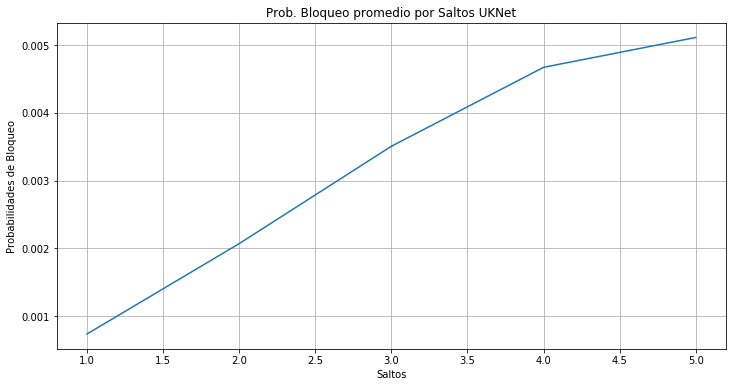

In [36]:
plt.title("Prob. Bloqueo promedio por Saltos "+str(name1))
plt.xlabel("Saltos")
plt.ylabel("Probabilidades de Bloqueo")
plt.plot([1,2,3,4,5],prom1[0:5])
plt.grid()

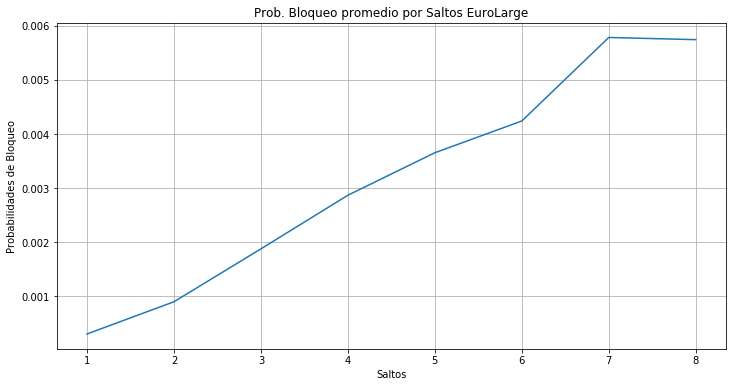

In [37]:
plt.title("Prob. Bloqueo promedio por Saltos "+str(name2))
plt.xlabel("Saltos")
plt.ylabel("Probabilidades de Bloqueo")
plt.plot([1,2,3,4,5,6,7,8],prom2)
plt.grid()

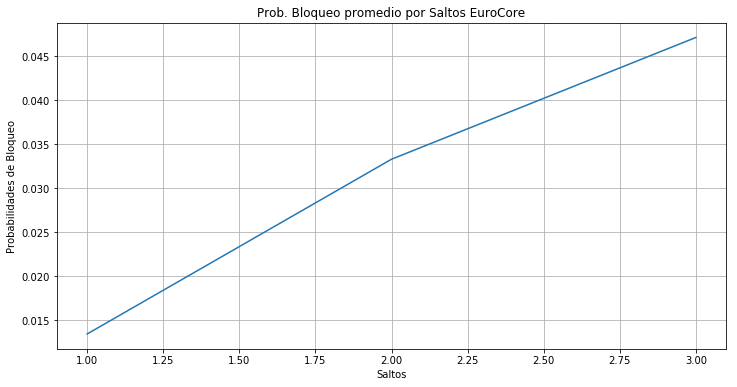

In [38]:
plt.title("Prob. Bloqueo promedio por Saltos "+str(name3))
plt.xlabel("Saltos")
plt.ylabel("Probabilidades de Bloqueo")
plt.plot([1,2,3],prom3[0:3])
plt.grid()

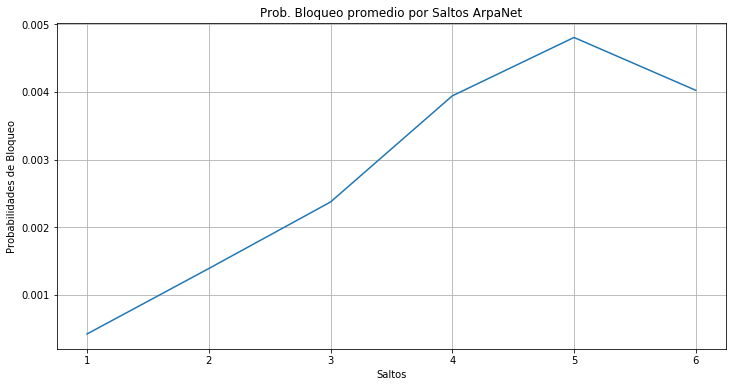

In [40]:
plt.title("Prob. Bloqueo promedio por Saltos "+str(name4))
plt.xlabel("Saltos")
plt.ylabel("Probabilidades de Bloqueo")
plt.plot([1,2,3,4,5,6],prom4[0:6])
plt.grid()

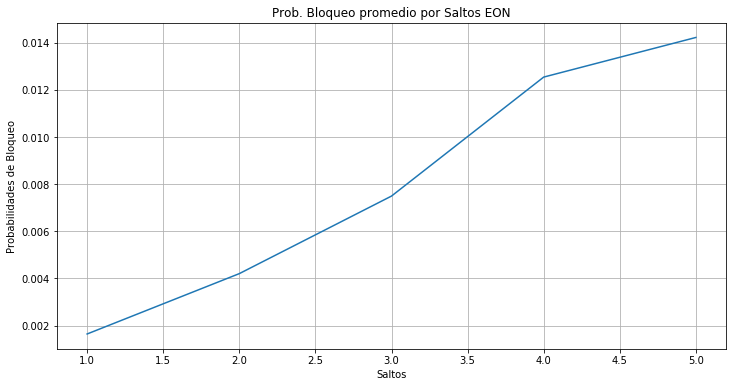

In [41]:
plt.title("Prob. Bloqueo promedio por Saltos "+str(name5))
plt.xlabel("Saltos")
plt.ylabel("Probabilidades de Bloqueo")
plt.plot([1,2,3,4,5],prom5[0:5])
plt.grid()

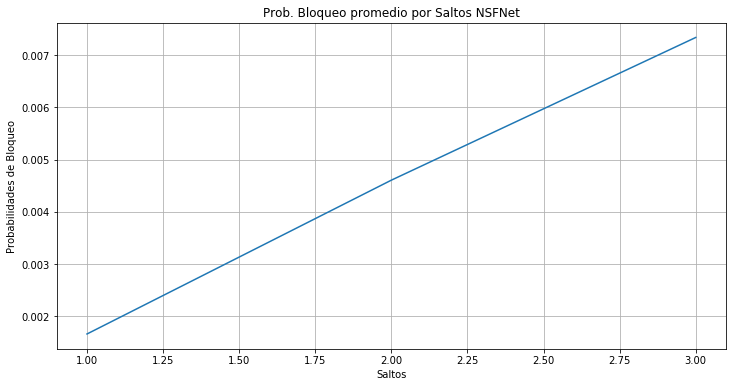

In [43]:
plt.title("Prob. Bloqueo promedio por Saltos "+str(name6))
plt.xlabel("Saltos")
plt.ylabel("Probabilidades de Bloqueo")
plt.plot([1,2,3],prom6[0:3])
plt.grid()

- Tal como se esparaba, 5 de las 6 redes, aumentaron su probabilidad de bloqueo, a medida que se aumenta la cantidad de saltos en la ruta. Respecto a "ArpaNet" en el ultimo salto, existe una disminución de la probabilidad, que puede ser por la aleatoriedad involucrada en el proceso, que haya generado esta "anomalía", otra razón posible es que los enlaces involucrados en la ruta con mas saltos haya sido escasamente usada durante el proceso, generando así una probabilidad muy pequeña debido al poco uso de esta.

